In [1]:
import numpy as np
import laserhockey.hockey_env as h_env
import gymnasium as gym
from importlib import reload
import time
import torch
import DDPG
import TD3
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle

In [5]:
def moving_average(data, win_size):
    data = np.asarray(data)
    averages = []
    for i in range(len(data)-win_size):
        averages.append(np.sum(data[i:i+win_size])/win_size)
    return averages

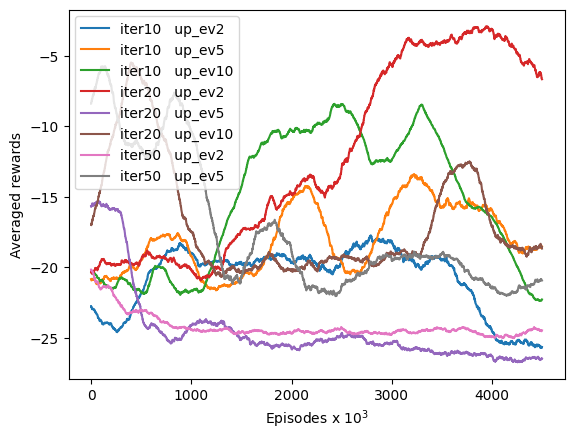

In [21]:
agent = "TD3Agent"
env = "hockey"
mode = "normal"
ids = []
rewards = []
for iter in [10,20,50]:
    for up_ev in [2,5,10]:
        if iter==50 and up_ev==10:
            break
        name = f"iter{iter}_up_ev{up_ev}"
        with (open(f"results/{agent}_{env}_{name}_{mode}_train_stats.pkl", "rb")) as openfile:
            loaded_stats = pickle.load(openfile)
            rewards.append(moving_average(loaded_stats["Rewards"],500))
            ids.append(f'iter{iter}   up_ev{up_ev}')
fig,ax = plt.subplots()
for ii, r in enumerate(rewards):
    ax.plot(r, label=ids[ii])
ax.set_xlabel("Episodes x $10^{3}$")
ax.set_ylabel("Averaged rewards")
plt.legend()